# Concrete data strength

In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequentialquential

In [3]:
from keras.layers import Dense, Activation,Layer,Lambda

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("concrete.csv")

In [7]:
df.shape

(1030, 9)

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [10]:
y=df['strength']

In [11]:
x=df.drop(['strength'],axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [14]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [19]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [35]:
first_model = prep_model([8,50,1])
first_model.fit(np.array(x),np.array(y),epochs=500)
pred_train = first_model.predict(np.array(x))

Epoch 1/500
1030/1030 [==============================] - 0s 310us/step - loss: 1365.7673 - acc: 9.7087e-04
Epoch 2/500
1030/1030 [==============================] - 0s 50us/step - loss: 376.5285 - acc: 0.0000e+00
Epoch 3/500
1030/1030 [==============================] - 0s 59us/step - loss: 249.9333 - acc: 0.0000e+00
Epoch 4/500
1030/1030 [==============================] - 0s 50us/step - loss: 200.0754 - acc: 0.0000e+00
Epoch 5/500
1030/1030 [==============================] - 0s 51us/step - loss: 167.9459 - acc: 0.0019
Epoch 6/500
1030/1030 [==============================] - 0s 51us/step - loss: 144.6514 - acc: 0.0000e+00
Epoch 7/500
1030/1030 [==============================] - 0s 59us/step - loss: 124.7386 - acc: 0.0000e+00
Epoch 8/500
1030/1030 [==============================] - 0s 57us/step - loss: 112.5356 - acc: 0.0000e+00
Epoch 9/500
1030/1030 [==============================] - 0s 62us/step - loss: 103.1174 - acc: 0.0000e+00
Epoch 10/500
1030/1030 [==============================] -

1030/1030 [==============================] - 0s 58us/step - loss: 55.9540 - acc: 0.0000e+00
Epoch 80/500
1030/1030 [==============================] - 0s 58us/step - loss: 47.8154 - acc: 0.0019
Epoch 81/500
1030/1030 [==============================] - 0s 66us/step - loss: 44.8786 - acc: 0.0000e+00
Epoch 82/500
1030/1030 [==============================] - 0s 66us/step - loss: 44.6919 - acc: 0.0000e+00
Epoch 83/500
1030/1030 [==============================] - 0s 62us/step - loss: 49.2160 - acc: 0.0019
Epoch 84/500
1030/1030 [==============================] - 0s 51us/step - loss: 52.9552 - acc: 9.7087e-04
Epoch 85/500
1030/1030 [==============================] - 0s 50us/step - loss: 48.0791 - acc: 0.0019
Epoch 86/500
1030/1030 [==============================] - 0s 47us/step - loss: 45.0907 - acc: 0.0000e+00
Epoch 87/500
1030/1030 [==============================] - 0s 52us/step - loss: 45.5545 - acc: 0.0019
Epoch 88/500
1030/1030 [==============================] - 0s 62us/step - loss: 45.56

1030/1030 [==============================] - 0s 53us/step - loss: 41.2485 - acc: 0.0000e+00
Epoch 158/500
1030/1030 [==============================] - 0s 49us/step - loss: 46.7000 - acc: 9.7087e-04
Epoch 159/500
1030/1030 [==============================] - 0s 51us/step - loss: 42.1275 - acc: 0.0000e+00
Epoch 160/500
1030/1030 [==============================] - 0s 58us/step - loss: 45.6635 - acc: 9.7087e-04
Epoch 161/500
1030/1030 [==============================] - 0s 53us/step - loss: 41.1422 - acc: 0.0000e+00
Epoch 162/500
1030/1030 [==============================] - 0s 54us/step - loss: 42.6279 - acc: 0.0000e+00
Epoch 163/500
1030/1030 [==============================] - 0s 51us/step - loss: 40.7800 - acc: 0.0000e+00
Epoch 164/500
1030/1030 [==============================] - 0s 52us/step - loss: 42.2821 - acc: 0.0019
Epoch 165/500
1030/1030 [==============================] - 0s 52us/step - loss: 41.8240 - acc: 0.0000e+00
Epoch 166/500
1030/1030 [==============================] - 0s 53

1030/1030 [==============================] - 0s 50us/step - loss: 40.4305 - acc: 9.7087e-04
Epoch 236/500
1030/1030 [==============================] - 0s 74us/step - loss: 42.7385 - acc: 0.0000e+00
Epoch 237/500
1030/1030 [==============================] - 0s 54us/step - loss: 38.3779 - acc: 9.7087e-04
Epoch 238/500
1030/1030 [==============================] - 0s 51us/step - loss: 39.0623 - acc: 0.0019
Epoch 239/500
1030/1030 [==============================] - 0s 54us/step - loss: 41.3478 - acc: 0.0000e+00
Epoch 240/500
1030/1030 [==============================] - 0s 51us/step - loss: 37.6909 - acc: 0.0000e+00
Epoch 241/500
1030/1030 [==============================] - 0s 50us/step - loss: 38.3673 - acc: 0.0029
Epoch 242/500
1030/1030 [==============================] - 0s 56us/step - loss: 40.0740 - acc: 9.7087e-04
Epoch 243/500
1030/1030 [==============================] - 0s 52us/step - loss: 43.1443 - acc: 9.7087e-04
Epoch 244/500
1030/1030 [==============================] - 0s 48us/s

1030/1030 [==============================] - 0s 56us/step - loss: 35.9229 - acc: 9.7087e-04
Epoch 314/500
1030/1030 [==============================] - 0s 56us/step - loss: 37.0994 - acc: 0.0000e+00
Epoch 315/500
1030/1030 [==============================] - 0s 50us/step - loss: 36.4693 - acc: 9.7087e-04
Epoch 316/500
1030/1030 [==============================] - 0s 55us/step - loss: 36.0050 - acc: 0.0000e+00
Epoch 317/500
1030/1030 [==============================] - 0s 52us/step - loss: 37.0027 - acc: 0.0000e+00
Epoch 318/500
1030/1030 [==============================] - 0s 57us/step - loss: 35.9372 - acc: 9.7087e-04
Epoch 319/500
1030/1030 [==============================] - 0s 62us/step - loss: 35.6590 - acc: 9.7087e-04
Epoch 320/500
1030/1030 [==============================] - 0s 62us/step - loss: 37.4608 - acc: 0.0029
Epoch 321/500
1030/1030 [==============================] - 0s 62us/step - loss: 37.1730 - acc: 0.0019
Epoch 322/500
1030/1030 [==============================] - 0s 62us/s

1030/1030 [==============================] - 0s 53us/step - loss: 36.3200 - acc: 0.0019
Epoch 392/500
1030/1030 [==============================] - 0s 63us/step - loss: 33.2002 - acc: 0.0019
Epoch 393/500
1030/1030 [==============================] - 0s 49us/step - loss: 36.6816 - acc: 0.0029
Epoch 394/500
1030/1030 [==============================] - 0s 57us/step - loss: 38.9747 - acc: 9.7087e-04
Epoch 395/500
1030/1030 [==============================] - 0s 50us/step - loss: 34.7612 - acc: 0.0019
Epoch 396/500
1030/1030 [==============================] - 0s 50us/step - loss: 34.7376 - acc: 0.0019
Epoch 397/500
1030/1030 [==============================] - 0s 49us/step - loss: 33.5271 - acc: 0.0000e+00
Epoch 398/500
1030/1030 [==============================] - 0s 54us/step - loss: 33.5066 - acc: 0.0000e+00
Epoch 399/500
1030/1030 [==============================] - 0s 48us/step - loss: 35.0721 - acc: 0.0000e+00
Epoch 400/500
1030/1030 [==============================] - 0s 49us/step - loss: 

1030/1030 [==============================] - 0s 58us/step - loss: 32.3577 - acc: 0.0019
Epoch 470/500
1030/1030 [==============================] - 0s 54us/step - loss: 33.4759 - acc: 9.7087e-04
Epoch 471/500
1030/1030 [==============================] - 0s 52us/step - loss: 31.9620 - acc: 0.0019
Epoch 472/500
1030/1030 [==============================] - 0s 53us/step - loss: 32.8731 - acc: 0.0029
Epoch 473/500
1030/1030 [==============================] - 0s 60us/step - loss: 33.4579 - acc: 9.7087e-04
Epoch 474/500
1030/1030 [==============================] - 0s 51us/step - loss: 32.8365 - acc: 0.0019
Epoch 475/500
1030/1030 [==============================] - 0s 55us/step - loss: 38.3550 - acc: 9.7087e-04
Epoch 476/500
1030/1030 [==============================] - 0s 53us/step - loss: 33.3597 - acc: 9.7087e-04
Epoch 477/500
1030/1030 [==============================] - 0s 52us/step - loss: 34.3870 - acc: 0.0000e+00
Epoch 478/500
1030/1030 [==============================] - 0s 59us/step - lo

In [36]:
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-y)**2))

In [37]:
import matplotlib.pyplot as plt

np.corrcoef(pred_train,y)

array([[1.        , 0.94439676],
       [0.94439676, 1.        ]])

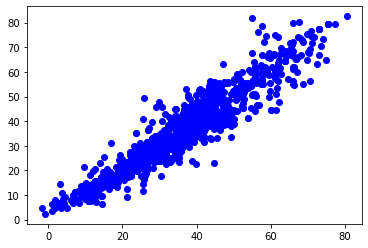

In [38]:
plt.plot(pred_train,y,"bo")

In [39]:
rmse_value

5.4961737213754285

# Startup profit

In [40]:
df=pd.read_csv('50_Startups.csv')

In [41]:
df.shape

(50, 5)

In [42]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
df1=pd.get_dummies(df)

In [50]:
y=df1['Profit']

In [51]:
x=df1.drop(['Profit'],axis=1)

In [71]:
model1=prep_model([6,40,1])

In [72]:
model1.fit(x,y,epochs=500)

Epoch 1/500
50/50 [==============================] - 0s 7ms/step - loss: 8776159416.3200 - acc: 0.0000e+00
Epoch 2/500
50/50 [==============================] - 0s 388us/step - loss: 7947033927.6800 - acc: 0.0000e+00
Epoch 3/500
50/50 [==============================] - 0s 240us/step - loss: 7181584998.4000 - acc: 0.0000e+00
Epoch 4/500
50/50 [==============================] - 0s 160us/step - loss: 6425886433.2800 - acc: 0.0000e+00
Epoch 5/500
50/50 [==============================] - 0s 160us/step - loss: 5756293201.9200 - acc: 0.0000e+00
Epoch 6/500
50/50 [==============================] - 0s 80us/step - loss: 5096751943.6800 - acc: 0.0000e+00
Epoch 7/500
50/50 [==============================] - 0s 160us/step - loss: 4484615127.0400 - acc: 0.0000e+00
Epoch 8/500
50/50 [==============================] - 0s 160us/step - loss: 3907159019.5200 - acc: 0.0000e+00
Epoch 9/500
50/50 [==============================] - 0s 240us/step - loss: 3413663242.2400 - acc: 0.0000e+00
Epoch 10/500
50/50 [==

50/50 [==============================] - 0s 160us/step - loss: 268653705.6000 - acc: 0.0000e+00
Epoch 77/500
50/50 [==============================] - 0s 320us/step - loss: 267048440.3200 - acc: 0.0000e+00
Epoch 78/500
50/50 [==============================] - 0s 160us/step - loss: 264710515.2000 - acc: 0.0000e+00
Epoch 79/500
50/50 [==============================] - 0s 160us/step - loss: 263049980.1600 - acc: 0.0000e+00
Epoch 80/500
50/50 [==============================] - 0s 160us/step - loss: 261089526.4000 - acc: 0.0000e+00
Epoch 81/500
50/50 [==============================] - 0s 240us/step - loss: 259603189.1200 - acc: 0.0000e+00
Epoch 82/500
50/50 [==============================] - 0s 160us/step - loss: 257621224.9600 - acc: 0.0000e+00
Epoch 83/500
50/50 [==============================] - 0s 80us/step - loss: 255883216.6400 - acc: 0.0000e+00
Epoch 84/500
50/50 [==============================] - 0s 240us/step - loss: 254385676.8000 - acc: 0.0000e+00
Epoch 85/500
50/50 [=============

50/50 [==============================] - 0s 160us/step - loss: 196437477.7600 - acc: 0.0000e+00
Epoch 151/500
50/50 [==============================] - 0s 160us/step - loss: 196310590.7200 - acc: 0.0000e+00
Epoch 152/500
50/50 [==============================] - 0s 160us/step - loss: 195565400.3200 - acc: 0.0000e+00
Epoch 153/500
50/50 [==============================] - 0s 240us/step - loss: 195448800.9600 - acc: 0.0000e+00
Epoch 154/500
50/50 [==============================] - 0s 160us/step - loss: 194723306.2400 - acc: 0.0000e+00
Epoch 155/500
50/50 [==============================] - 0s 80us/step - loss: 194497745.9200 - acc: 0.0000e+00
Epoch 156/500
50/50 [==============================] - 0s 80us/step - loss: 194325034.2400 - acc: 0.0000e+00
Epoch 157/500
50/50 [==============================] - 0s 160us/step - loss: 193963836.8000 - acc: 0.0000e+00
Epoch 158/500
50/50 [==============================] - 0s 240us/step - loss: 193452113.9200 - acc: 0.0000e+00
Epoch 159/500
50/50 [=====

50/50 [==============================] - 0s 160us/step - loss: 180580719.3600 - acc: 0.0000e+00
Epoch 225/500
50/50 [==============================] - 0s 160us/step - loss: 180629301.7600 - acc: 0.0000e+00
Epoch 226/500
50/50 [==============================] - 0s 160us/step - loss: 180490812.1600 - acc: 0.0000e+00
Epoch 227/500
50/50 [==============================] - 0s 80us/step - loss: 180591255.0400 - acc: 0.0000e+00
Epoch 228/500
50/50 [==============================] - 0s 80us/step - loss: 180613398.4000 - acc: 0.0000e+00
Epoch 229/500
50/50 [==============================] - 0s 240us/step - loss: 180131651.2000 - acc: 0.0000e+00
Epoch 230/500
50/50 [==============================] - 0s 80us/step - loss: 179842988.8000 - acc: 0.0000e+00
Epoch 231/500
50/50 [==============================] - 0s 80us/step - loss: 180026714.8800 - acc: 0.0000e+00
Epoch 232/500
50/50 [==============================] - 0s 160us/step - loss: 179713650.5600 - acc: 0.0000e+00
Epoch 233/500
50/50 [=======

50/50 [==============================] - 0s 160us/step - loss: 175153232.6400 - acc: 0.0000e+00
Epoch 299/500
50/50 [==============================] - 0s 240us/step - loss: 175078738.5600 - acc: 0.0000e+00
Epoch 300/500
50/50 [==============================] - 0s 160us/step - loss: 175036446.7200 - acc: 0.0000e+00
Epoch 301/500
50/50 [==============================] - 0s 80us/step - loss: 175471598.0800 - acc: 0.0000e+00
Epoch 302/500
50/50 [==============================] - 0s 160us/step - loss: 175318982.7200 - acc: 0.0000e+00
Epoch 303/500
50/50 [==============================] - 0s 160us/step - loss: 175159615.3600 - acc: 0.0000e+00
Epoch 304/500
50/50 [==============================] - 0s 160us/step - loss: 174992555.5200 - acc: 0.0000e+00
Epoch 305/500
50/50 [==============================] - 0s 160us/step - loss: 175283761.9200 - acc: 0.0000e+00
Epoch 306/500
50/50 [==============================] - 0s 240us/step - loss: 175860175.3600 - acc: 0.0000e+00
Epoch 307/500
50/50 [====

50/50 [==============================] - 0s 80us/step - loss: 173653106.5600 - acc: 0.0000e+00
Epoch 373/500
50/50 [==============================] - 0s 160us/step - loss: 173428520.3200 - acc: 0.0000e+00
Epoch 374/500
50/50 [==============================] - 0s 160us/step - loss: 173259783.6800 - acc: 0.0000e+00
Epoch 375/500
50/50 [==============================] - 0s 160us/step - loss: 173146794.8800 - acc: 0.0000e+00
Epoch 376/500
50/50 [==============================] - 0s 160us/step - loss: 172968151.6800 - acc: 0.0000e+00
Epoch 377/500
50/50 [==============================] - 0s 160us/step - loss: 173115463.6800 - acc: 0.0000e+00
Epoch 378/500
50/50 [==============================] - 0s 160us/step - loss: 173175258.8800 - acc: 0.0000e+00
Epoch 379/500
50/50 [==============================] - 0s 240us/step - loss: 173667602.2400 - acc: 0.0000e+00
Epoch 380/500
50/50 [==============================] - 0s 240us/step - loss: 173069391.3600 - acc: 0.0000e+00
Epoch 381/500
50/50 [====

50/50 [==============================] - 0s 240us/step - loss: 171325971.2000 - acc: 0.0000e+00
Epoch 447/500
50/50 [==============================] - 0s 160us/step - loss: 171827880.3200 - acc: 0.0000e+00
Epoch 448/500
50/50 [==============================] - 0s 240us/step - loss: 171142120.3200 - acc: 0.0000e+00
Epoch 449/500
50/50 [==============================] - 0s 160us/step - loss: 171226322.5600 - acc: 0.0000e+00
Epoch 450/500
50/50 [==============================] - 0s 160us/step - loss: 171017950.7200 - acc: 0.0000e+00
Epoch 451/500
50/50 [==============================] - 0s 80us/step - loss: 170994563.2000 - acc: 0.0000e+00
Epoch 452/500
50/50 [==============================] - 0s 80us/step - loss: 171036744.3200 - acc: 0.0000e+00
Epoch 453/500
50/50 [==============================] - 0s 160us/step - loss: 171007520.0000 - acc: 0.0000e+00
Epoch 454/500
50/50 [==============================] - 0s 80us/step - loss: 171122378.2400 - acc: 0.0000e+00
Epoch 455/500
50/50 [======

In [73]:
pred_train=model1.predict(x)

In [74]:
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-y)**2))

In [75]:
rmse_value

13037.966541199025

In [76]:
np.corrcoef(pred_train,y)

array([[1.        , 0.95294843],
       [0.95294843, 1.        ]])

In [77]:
pred_train[0]

204523.5625

In [78]:
y[0]

192261.83

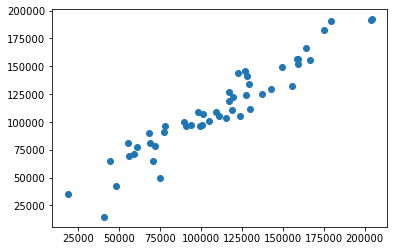

In [79]:
plt.scatter(pred_train,y)

# Forest Fires

In [260]:
df=pd.read_csv('forestfires.csv')

In [261]:
df.shape

(517, 31)

In [262]:
df.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


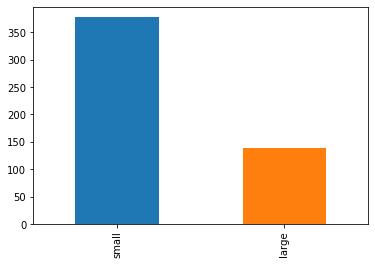

In [263]:
df['size_category'].value_counts().plot(kind='bar')

In [264]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [265]:
df=df.drop(['month'],axis=1)

In [266]:
df=df.drop(['day'],axis=1)

In [267]:
df.shape

(517, 29)

In [268]:
df.loc[df.size_category=="large","size_category"] = 1
df.loc[df.size_category=="small","size_category"] = 0

In [269]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [270]:
def prep_model1(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [271]:
y=df['size_category']

In [272]:
y.shape

(517,)

In [273]:
x=df.drop(['size_category'],axis=1)

In [274]:
x.shape

(517, 28)

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [300]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [301]:
modelf=prep_model1([28,50,40,30,20,1])

In [302]:
modelf.fit(np.array(x_train),np.array(y_train),epochs=800)

Epoch 1/800
413/413 [==============================] - 1s 1ms/step - loss: 0.6888 - acc: 0.6707
Epoch 2/800
413/413 [==============================] - 0s 58us/step - loss: 0.5392 - acc: 0.7530
Epoch 3/800
413/413 [==============================] - 0s 65us/step - loss: 0.4976 - acc: 0.7724
Epoch 4/800
413/413 [==============================] - 0s 70us/step - loss: 0.5032 - acc: 0.7966
Epoch 5/800
413/413 [==============================] - 0s 65us/step - loss: 0.4777 - acc: 0.7724
Epoch 6/800
413/413 [==============================] - 0s 68us/step - loss: 0.4346 - acc: 0.7651
Epoch 7/800
413/413 [==============================] - 0s 72us/step - loss: 0.4769 - acc: 0.7869
Epoch 8/800
413/413 [==============================] - 0s 67us/step - loss: 0.3702 - acc: 0.8426
Epoch 9/800
413/413 [==============================] - 0s 65us/step - loss: 0.4311 - acc: 0.7990
Epoch 10/800
413/413 [==============================] - 0s 63us/step - loss: 0.3947 - acc: 0.8378
Epoch 11/800
413/413 [========

413/413 [==============================] - 0s 68us/step - loss: 0.1349 - acc: 0.9467
Epoch 85/800
413/413 [==============================] - 0s 75us/step - loss: 0.0688 - acc: 0.9685
Epoch 86/800
413/413 [==============================] - 0s 72us/step - loss: 0.0624 - acc: 0.9685
Epoch 87/800
413/413 [==============================] - 0s 65us/step - loss: 0.0462 - acc: 0.9855
Epoch 88/800
413/413 [==============================] - 0s 63us/step - loss: 0.2079 - acc: 0.9419
Epoch 89/800
413/413 [==============================] - 0s 58us/step - loss: 0.0311 - acc: 0.9831
Epoch 90/800
413/413 [==============================] - 0s 63us/step - loss: 0.0789 - acc: 0.9685
Epoch 91/800
413/413 [==============================] - 0s 63us/step - loss: 0.0422 - acc: 0.9831
Epoch 92/800
413/413 [==============================] - ETA: 0s - loss: 0.9086 - acc: 0.781 - 0s 63us/step - loss: 0.1196 - acc: 0.9661
Epoch 93/800
413/413 [==============================] - 0s 63us/step - loss: 0.0189 - acc: 0.

413/413 [==============================] - 0s 58us/step - loss: 0.0686 - acc: 0.9758
Epoch 167/800
413/413 [==============================] - 0s 72us/step - loss: 0.0312 - acc: 0.9903
Epoch 168/800
413/413 [==============================] - 0s 68us/step - loss: 0.0439 - acc: 0.9831
Epoch 169/800
413/413 [==============================] - 0s 56us/step - loss: 0.0478 - acc: 0.9806
Epoch 170/800
413/413 [==============================] - 0s 65us/step - loss: 0.0571 - acc: 0.9831
Epoch 171/800
413/413 [==============================] - 0s 60us/step - loss: 0.0202 - acc: 0.9976
Epoch 172/800
413/413 [==============================] - 0s 60us/step - loss: 0.1010 - acc: 0.9685
Epoch 173/800
413/413 [==============================] - ETA: 0s - loss: 0.0568 - acc: 0.968 - 0s 65us/step - loss: 0.0343 - acc: 0.9831
Epoch 174/800
413/413 [==============================] - 0s 60us/step - loss: 0.0451 - acc: 0.9734
Epoch 175/800
413/413 [==============================] - 0s 65us/step - loss: 0.0436 

413/413 [==============================] - 0s 65us/step - loss: 0.0336 - acc: 0.9831
Epoch 249/800
413/413 [==============================] - 0s 60us/step - loss: 0.0411 - acc: 0.9855
Epoch 250/800
413/413 [==============================] - 0s 65us/step - loss: 0.0578 - acc: 0.9855
Epoch 251/800
413/413 [==============================] - 0s 58us/step - loss: 0.0886 - acc: 0.9855
Epoch 252/800
413/413 [==============================] - 0s 60us/step - loss: 0.0186 - acc: 0.9952
Epoch 253/800
413/413 [==============================] - 0s 63us/step - loss: 0.0251 - acc: 0.9855
Epoch 254/800
413/413 [==============================] - 0s 60us/step - loss: 0.0619 - acc: 0.9806
Epoch 255/800
413/413 [==============================] - 0s 60us/step - loss: 0.0288 - acc: 0.9927
Epoch 256/800
413/413 [==============================] - 0s 68us/step - loss: 0.0294 - acc: 0.9831
Epoch 257/800
413/413 [==============================] - 0s 65us/step - loss: 0.0491 - acc: 0.9782
Epoch 258/800
413/413 [=

413/413 [==============================] - 0s 60us/step - loss: 0.0102 - acc: 0.9952
Epoch 331/800
413/413 [==============================] - 0s 61us/step - loss: 0.0404 - acc: 0.9903
Epoch 332/800
413/413 [==============================] - 0s 60us/step - loss: 0.0473 - acc: 0.9855
Epoch 333/800
413/413 [==============================] - 0s 65us/step - loss: 0.0207 - acc: 0.9927
Epoch 334/800
413/413 [==============================] - 0s 60us/step - loss: 0.0341 - acc: 0.9879
Epoch 335/800
413/413 [==============================] - 0s 60us/step - loss: 0.0345 - acc: 0.9927
Epoch 336/800
413/413 [==============================] - 0s 58us/step - loss: 0.0149 - acc: 0.9952
Epoch 337/800
413/413 [==============================] - 0s 63us/step - loss: 0.0658 - acc: 0.9879
Epoch 338/800
413/413 [==============================] - 0s 60us/step - loss: 0.0462 - acc: 0.9855
Epoch 339/800
413/413 [==============================] - 0s 65us/step - loss: 0.0346 - acc: 0.9879
Epoch 340/800
413/413 [=

413/413 [==============================] - 0s 56us/step - loss: 0.0168 - acc: 0.9927
Epoch 413/800
413/413 [==============================] - 0s 60us/step - loss: 0.1231 - acc: 0.9879
Epoch 414/800
413/413 [==============================] - 0s 60us/step - loss: 0.0319 - acc: 0.9879
Epoch 415/800
413/413 [==============================] - 0s 63us/step - loss: 0.0165 - acc: 0.9903
Epoch 416/800
413/413 [==============================] - 0s 60us/step - loss: 0.0647 - acc: 0.9903
Epoch 417/800
413/413 [==============================] - 0s 68us/step - loss: 0.0095 - acc: 0.9952
Epoch 418/800
413/413 [==============================] - 0s 60us/step - loss: 0.0238 - acc: 0.9855
Epoch 419/800
413/413 [==============================] - 0s 60us/step - loss: 0.1074 - acc: 0.9903
Epoch 420/800
413/413 [==============================] - 0s 60us/step - loss: 0.0110 - acc: 0.9976
Epoch 421/800
413/413 [==============================] - 0s 63us/step - loss: 0.0453 - acc: 0.9903
Epoch 422/800
413/413 [=

413/413 [==============================] - 0s 70us/step - loss: 0.0152 - acc: 0.9927
Epoch 495/800
413/413 [==============================] - 0s 63us/step - loss: 0.0348 - acc: 0.9927
Epoch 496/800
413/413 [==============================] - 0s 58us/step - loss: 0.0304 - acc: 0.9927
Epoch 497/800
413/413 [==============================] - 0s 61us/step - loss: 0.0177 - acc: 0.9952
Epoch 498/800
413/413 [==============================] - 0s 65us/step - loss: 0.0145 - acc: 0.9927
Epoch 499/800
413/413 [==============================] - 0s 60us/step - loss: 0.0033 - acc: 1.0000
Epoch 500/800
413/413 [==============================] - 0s 63us/step - loss: 0.1790 - acc: 0.9855
Epoch 501/800
413/413 [==============================] - 0s 60us/step - loss: 0.0058 - acc: 0.9976
Epoch 502/800
413/413 [==============================] - 0s 58us/step - loss: 0.0694 - acc: 0.9879
Epoch 503/800
413/413 [==============================] - 0s 63us/step - loss: 0.0026 - acc: 1.0000
Epoch 504/800
413/413 [=

413/413 [==============================] - 0s 63us/step - loss: 7.6956e-04 - acc: 1.0000
Epoch 577/800
413/413 [==============================] - 0s 65us/step - loss: 1.9383e-04 - acc: 1.0000
Epoch 578/800
413/413 [==============================] - 0s 128us/step - loss: 1.2744e-04 - acc: 1.0000
Epoch 579/800
413/413 [==============================] - 0s 67us/step - loss: 0.0689 - acc: 0.9879
Epoch 580/800
413/413 [==============================] - 0s 63us/step - loss: 0.0062 - acc: 0.9976
Epoch 581/800
413/413 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 1.0000
Epoch 582/800
413/413 [==============================] - 0s 65us/step - loss: 0.0167 - acc: 0.9927
Epoch 583/800
413/413 [==============================] - 0s 65us/step - loss: 0.0502 - acc: 0.9903
Epoch 584/800
413/413 [==============================] - 0s 60us/step - loss: 0.0075 - acc: 0.9976
Epoch 585/800
413/413 [==============================] - 0s 68us/step - loss: 0.0425 - acc: 0.9952
Epoch 586/8

413/413 [==============================] - 0s 65us/step - loss: 3.5264e-04 - acc: 1.0000
Epoch 659/800
413/413 [==============================] - 0s 63us/step - loss: 0.1290 - acc: 0.9831
Epoch 660/800
413/413 [==============================] - 0s 58us/step - loss: 0.0028 - acc: 0.9976
Epoch 661/800
413/413 [==============================] - 0s 53us/step - loss: 3.4010e-04 - acc: 1.0000
Epoch 662/800
413/413 [==============================] - 0s 60us/step - loss: 0.0067 - acc: 0.9976
Epoch 663/800
413/413 [==============================] - 0s 63us/step - loss: 0.0538 - acc: 0.9903
Epoch 664/800
413/413 [==============================] - 0s 63us/step - loss: 0.0305 - acc: 0.9903
Epoch 665/800
413/413 [==============================] - 0s 63us/step - loss: 0.0032 - acc: 1.0000
Epoch 666/800
413/413 [==============================] - 0s 60us/step - loss: 0.0041 - acc: 0.9976
Epoch 667/800
413/413 [==============================] - 0s 65us/step - loss: 8.9981e-04 - acc: 1.0000
Epoch 668/80

Epoch 740/800
413/413 [==============================] - 0s 63us/step - loss: 5.0990e-07 - acc: 1.0000
Epoch 741/800
413/413 [==============================] - 0s 65us/step - loss: 4.7228e-07 - acc: 1.0000
Epoch 742/800
413/413 [==============================] - 0s 60us/step - loss: 4.2513e-07 - acc: 1.0000
Epoch 743/800
413/413 [==============================] - 0s 60us/step - loss: 3.6965e-07 - acc: 1.0000
Epoch 744/800
413/413 [==============================] - 0s 60us/step - loss: 2.9863e-07 - acc: 1.0000
Epoch 745/800
413/413 [==============================] - 0s 63us/step - loss: 2.4958e-07 - acc: 1.0000
Epoch 746/800
413/413 [==============================] - 0s 63us/step - loss: 1.9597e-07 - acc: 1.0000
Epoch 747/800
413/413 [==============================] - 0s 63us/step - loss: 1.7688e-07 - acc: 1.0000
Epoch 748/800
413/413 [==============================] - 0s 63us/step - loss: 1.5418e-07 - acc: 1.0000
Epoch 749/800
413/413 [==============================] - 0s 61us/step - l

In [303]:
pred_train=modelf.predict(np.array(x_train))

In [304]:
pred_train = pd.Series([i[0] for i in pred_train])
size_class = ["small","large"]

In [305]:
pred_train_class = pd.Series(["small"]*413)
pred_train_class[[i>0.5 for i in pred_train]] = "large"

In [306]:
from sklearn.metrics import confusion_matrix

In [307]:
train=df.iloc[:413,:]

In [308]:
train.shape

(413, 29)

In [309]:
train["original_class"] = "small"
train.loc[train.size_category==1,"original_class"] = "large"

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [310]:
train.original_class.value_counts()

small    305
large    108
Name: original_class, dtype: int64

In [311]:
confusion_matrix(pred_train_class,train.original_class)

array([[ 33,  79],
       [ 75, 226]], dtype=int64)

In [312]:
np.mean(pred_train_class==pd.Series(train.original_class).reset_index(drop=True))

0.6271186440677966

In [313]:
pd.crosstab(pred_train_class,pd.Series(train.original_class).reset_index(drop=True))

original_class,large,small
row_0,,
large,33,79
small,75,226


In [314]:
test=df.iloc[413:,:]

In [315]:
test.shape

(104, 29)

In [316]:
pred_test = modelf.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*104)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test["original_class"] = "small"
test.loc[test.size_category==1,"original_class"] = "large"

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [317]:
test.original_class.value_counts()

small    73
large    31
Name: original_class, dtype: int64

In [318]:
np.mean(pred_test_class==pd.Series(test.original_class).reset_index(drop=True))

0.5673076923076923

In [319]:
pd.crosstab(pred_test_class,pd.Series(test.original_class).reset_index(drop=True))

original_class,large,small
row_0,,
large,5,19
small,26,54


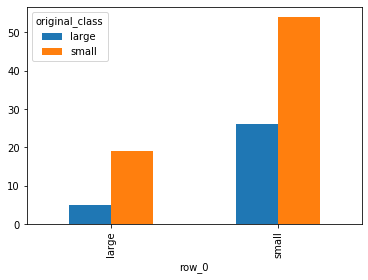

In [320]:
pd.crosstab(pred_test_class,pd.Series(test.original_class).reset_index(drop=True)).plot(kind="bar")

In [321]:
from keras.utils import plot_model